<a href="https://colab.research.google.com/github/Mountaineye/AGH/blob/main/OW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [ ]:
# Definicja funkcji celu
def F1(x):
    """Pierwsze kryterium do minimizacji."""
    return (x[0] - 0.5)**2 + (x[1] - 0.5)**2

def F2(x):
    """Drugie kryterium do minimizacji."""
    return (x[0] + 0.5)**2 + (x[1] + 0.5)**2

In [ ]:
# Funkcja skalaryzowana (kombinacja liniowa F1 i F2)
def scalarized_objective(x, lambdas):
    """Liniowa kombinacja funkcji celu F1 i F2."""
    return lambdas[0] * F1(x) + lambdas[1] * F2(x)

# Parametry skalaryzacji (wagi lambda)
lambda_values = np.linspace(0, 1, 20)  # 20 różnych wartości lambda dla równych kroków

# Inicjalizacja list na punkty Pareto
pareto_points = []

# Przestrzeń poszukiwań (ograniczenie do kwadratu [-1, 1]^2)
bounds = [(-1, 1), (-1, 1)]

In [ ]:
# Szukanie punktów Pareto
for lambda1 in lambda_values:
    lambdas = [lambda1, 1 - lambda1]  # Kombinacja lambda dla F1 i F2
    result = minimize(scalarized_objective, x0=[0, 0], args=(lambdas,), bounds=bounds)
    pareto_points.append(result.x)

# Konwersja listy Pareto na macierz dla ułatwienia wykresu
pareto_points = np.array(pareto_points)

# Obliczenie wartości F1 i F2 dla punktów Pareto
F1_values = [F1(point) for point in pareto_points]
F2_values = [F2(point) for point in pareto_points]

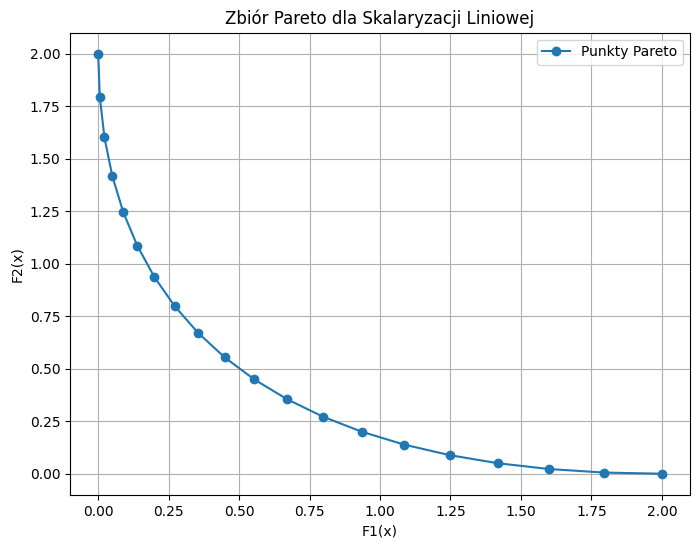

In [ ]:
# Wizualizacja wyników
plt.figure(figsize=(8, 6))
plt.plot(F1_values, F2_values, '-o', label='Punkty Pareto')
plt.xlabel('F1(x)')
plt.ylabel('F2(x)')
plt.title('Zbiór Pareto dla Skalaryzacji Liniowej')
plt.legend()
plt.grid(True)
plt.show()

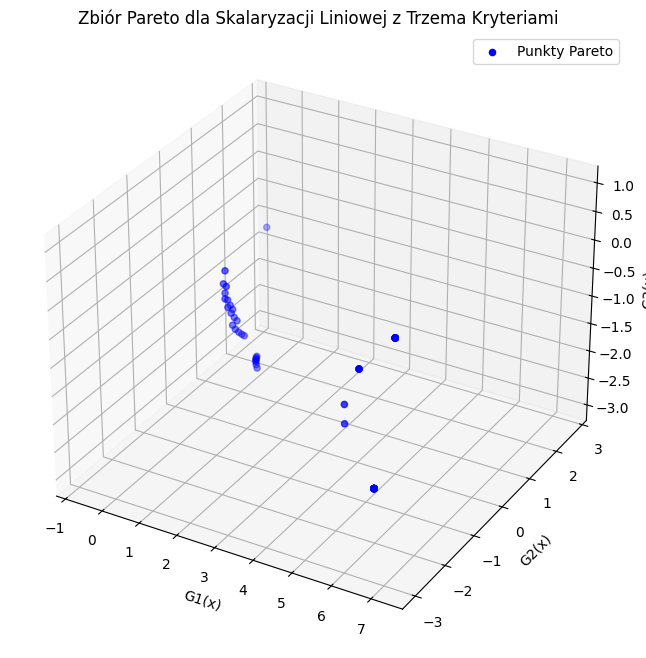

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji celu
def G1(x):
    """Pierwsze kryterium do minimizacji (nieliniowe)."""
    return (x[0] - 1)**2 + (x[1] - 0.5)**2 + np.sin(5 * x[0])  # nieliniowość przez funkcję sinus

def G2(x):
    """Drugie kryterium do minimizacji (liniowe)."""
    return 2 * x[0] + x[1]

def G3(x):
    """Trzecie kryterium do minimizacji (liniowe)."""
    return x[0] - 2 * x[1]

# Funkcja skalaryzowana (kombinacja liniowa G1, G2 i G3)
def scalarized_objective(x, lambdas):
    """Liniowa kombinacja funkcji celu G1, G2 i G3."""
    return lambdas[0] * G1(x) + lambdas[1] * G2(x) + lambdas[2] * G3(x)

# Generowanie różnych kombinacji wag lambda
lambda_values = np.linspace(0, 1, 10)  # Używamy 10 kroków dla lambda, dla różnorodnych kombinacji
lambda_combinations = [(l1, l2, 1 - l1 - l2) for l1 in lambda_values for l2 in lambda_values if l1 + l2 <= 1]

# Inicjalizacja list na punkty Pareto
pareto_points = []

# Przestrzeń poszukiwań (ograniczenie do kwadratu [-1, 1]^2)
bounds = [(-1, 1), (-1, 1)]

# Szukanie punktów Pareto
for lambdas in lambda_combinations:
    result = minimize(scalarized_objective, x0=[0, 0], args=(lambdas,), bounds=bounds)
    pareto_points.append(result.x)

# Konwersja listy Pareto na macierz dla ułatwienia wykresu
pareto_points = np.array(pareto_points)

# Obliczenie wartości G1, G2 i G3 dla punktów Pareto
G1_values = [G1(point) for point in pareto_points]
G2_values = [G2(point) for point in pareto_points]
G3_values = [G3(point) for point in pareto_points]

# Wizualizacja wyników w 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(G1_values, G2_values, G3_values, c='b', marker='o', label='Punkty Pareto')
ax.set_xlabel('G1(x)')
ax.set_ylabel('G2(x)')
ax.set_zlabel('G3(x)')
ax.set_title('Zbiór Pareto dla Skalaryzacji Liniowej z Trzema Kryteriami')
plt.legend()
plt.show()


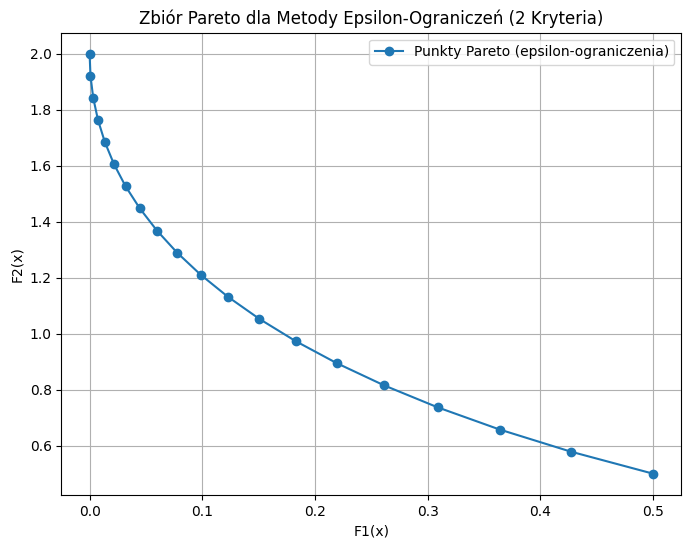

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Definicja funkcji celu
def F1(x):
    return (x[0] - 0.5)**2 + (x[1] - 0.5)**2

def F2(x):
    return (x[0] + 0.5)**2 + (x[1] + 0.5)**2

# Funkcja celu dla optymalizacji (minimalizujemy F1, F2 jako ograniczenie)
def objective_epsilon(x):
    return F1(x)

# Parametry epsilon dla ograniczenia F2
epsilon_values = np.linspace(0.5, 2.0, 20)

# Przestrzeń poszukiwań
bounds = [(-1, 1), (-1, 1)]
pareto_points = []

# Szukanie punktów Pareto
for epsilon in epsilon_values:
    # Definiujemy ograniczenie dla F2
    constraint = {'type': 'ineq', 'fun': lambda x: epsilon - F2(x)}
    result = minimize(objective_epsilon, x0=[0, 0], bounds=bounds, constraints=[constraint])
    if result.success:
        pareto_points.append(result.x)

pareto_points = np.array(pareto_points)
F1_values = [F1(point) for point in pareto_points]
F2_values = [F2(point) for point in pareto_points]

# Wizualizacja wyników
plt.figure(figsize=(8, 6))
plt.plot(F1_values, F2_values, '-o', label='Punkty Pareto (epsilon-ograniczenia)')
plt.xlabel('F1(x)')
plt.ylabel('F2(x)')
plt.title('Zbiór Pareto dla Metody Epsilon-Ograniczeń (2 Kryteria)')
plt.legend()
plt.grid(True)
plt.show()


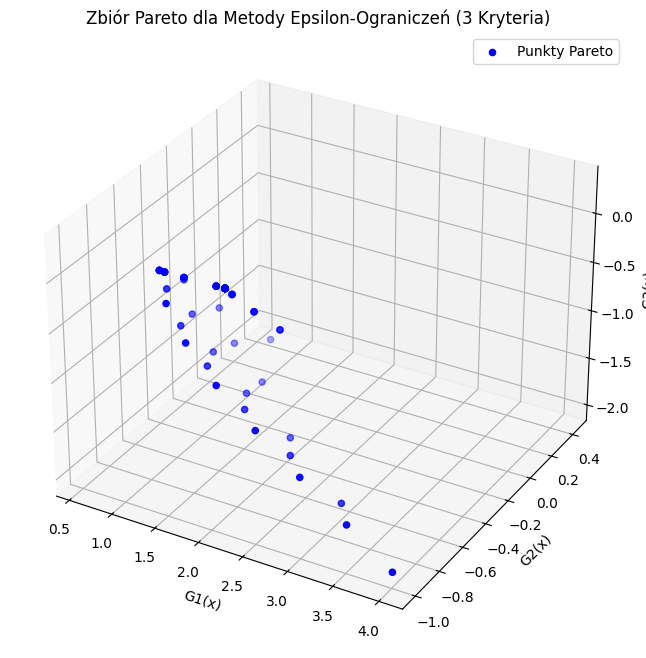

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji celu
def G1(x):
    return (x[0] - 1)**2 + (x[1] - 0.5)**2 + np.sin(5 * x[0])

def G2(x):
    return 2 * x[0] + x[1]

def G3(x):
    return x[0] - 2 * x[1]

# Funkcja celu dla optymalizacji (minimalizujemy G1, G2 i G3 jako ograniczenia)
def objective_epsilon_3(x):
    return G1(x)

# Parametry epsilon dla ograniczeń G2 i G3
epsilon_G2_values = np.linspace(-1, 2, 10)
epsilon_G3_values = np.linspace(-2, 1, 10)

# Przestrzeń poszukiwań
pareto_points = []
bounds = [(-1, 1), (-1, 1)]

# Szukanie punktów Pareto
for epsilon_G2 in epsilon_G2_values:
    for epsilon_G3 in epsilon_G3_values:
        constraints = [
            {'type': 'ineq', 'fun': lambda x: epsilon_G2 - G2(x)},
            {'type': 'ineq', 'fun': lambda x: epsilon_G3 - G3(x)}
        ]
        result = minimize(objective_epsilon_3, x0=[0, 0], bounds=bounds, constraints=constraints)
        if result.success:
            pareto_points.append(result.x)

pareto_points = np.array(pareto_points)
G1_values = [G1(point) for point in pareto_points]
G2_values = [G2(point) for point in pareto_points]
G3_values = [G3(point) for point in pareto_points]

# Wizualizacja wyników w 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(G1_values, G2_values, G3_values, c='b', marker='o', label='Punkty Pareto')
ax.set_xlabel('G1(x)')
ax.set_ylabel('G2(x)')
ax.set_zlabel('G3(x)')
ax.set_title('Zbiór Pareto dla Metody Epsilon-Ograniczeń (3 Kryteria)')
plt.legend()
plt.show()


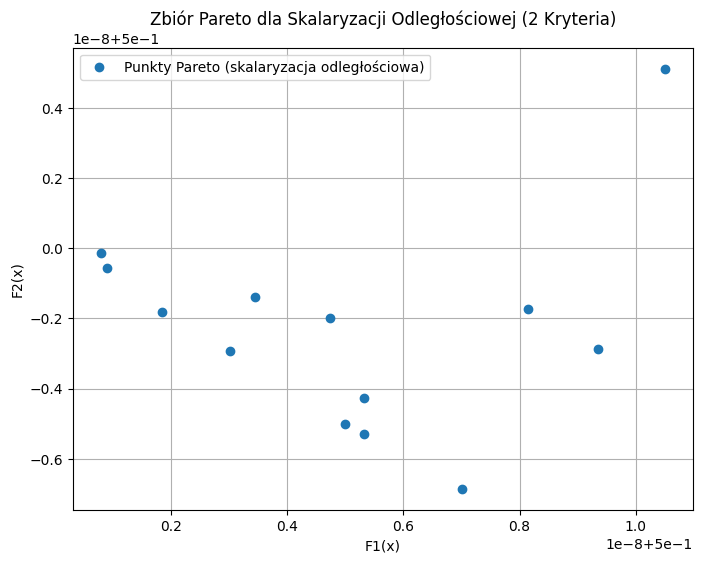

In [ ]:
# Definicja punktu odniesienia
x_ref = np.array([0.5, 0.5])

# Funkcja celu dla skalaryzacji odległościowej
def objective_distance(x):
    return np.sqrt((F1(x) - x_ref[0])**2 + (F2(x) - x_ref[1])**2)

# Przestrzeń poszukiwań
pareto_points = []
bounds = [(-1, 1), (-1, 1)]

# Szukanie punktów Pareto przy różnych wartościach x0
for i in range(20):
    initial_guess = np.random.uniform(-1, 1, size=2)
    result = minimize(objective_distance, x0=initial_guess, bounds=bounds)
    if result.success:
        pareto_points.append(result.x)

pareto_points = np.array(pareto_points)
F1_values = [F1(point) for point in pareto_points]
F2_values = [F2(point) for point in pareto_points]

# Wizualizacja wyników
plt.figure(figsize=(8, 6))
plt.plot(F1_values, F2_values, 'o', label='Punkty Pareto (skalaryzacja odległościowa)')
plt.xlabel('F1(x)')
plt.ylabel('F2(x)')
plt.title('Zbiór Pareto dla Skalaryzacji Odległościowej (2 Kryteria)')
plt.legend()
plt.grid(True)
plt.show()


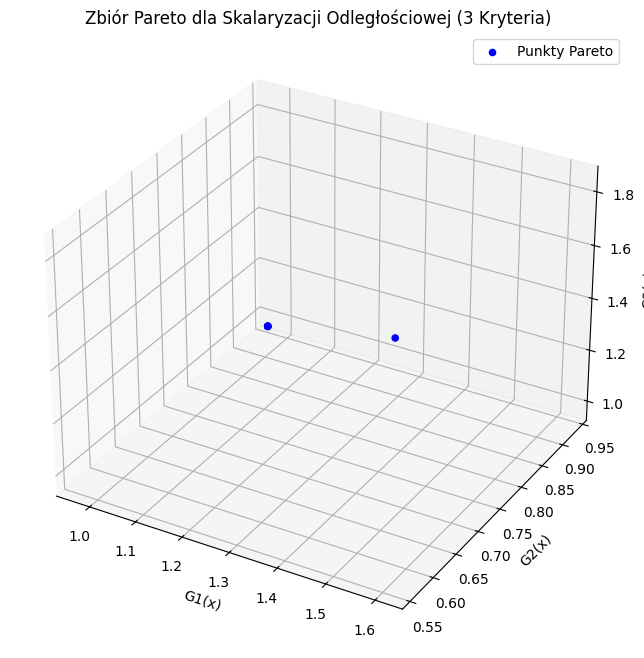

In [ ]:
# Punkt odniesienia
x_ref = np.array([1, 1, 1])

# Funkcja celu dla skalaryzacji odległościowej
def objective_distance_3(x):
    return np.sqrt((G1(x) - x_ref[0])**2 + (G2(x) - x_ref[1])**2 + (G3(x) - x_ref[2])**2)

# Przestrzeń poszukiwań
pareto_points = []
bounds = [(-1, 1), (-1, 1)]

# Szukanie punktów Pareto przy różnych wartościach x0
for i in range(20):
    initial_guess = np.random.uniform(-1, 1, size=2)
    result = minimize(objective_distance_3, x0=initial_guess, bounds=bounds)
    if result.success:
        pareto_points.append(result.x)

pareto_points = np.array(pareto_points)
G1_values = [G1(point) for point in pareto_points]
G2_values = [G2(point) for point in pareto_points]
G3_values = [G3(point) for point in pareto_points]

# Wizualizacja wyników w 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(G1_values, G2_values, G3_values, c='b', marker='o', label='Punkty Pareto')
ax.set_xlabel('G1(x)')
ax.set_ylabel('G2(x)')
ax.set_zlabel('G3(x)')
ax.set_title('Zbiór Pareto dla Skalaryzacji Odległościowej (3 Kryteria)')
plt.legend()
plt.show()
